IMPLEMENTATION DE K-MEANS EN PYTHON

In [1]:
#Importation des modules requis pour l'implementation
 
import numpy as np
from scipy.spatial.distance import cdist 
 
#Fonction pour implementer l'algorithme k-means
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #choisir aleatoirement les centres 
    centroids = x[idx, :] #premiere etape
     
    #trouver la distance entre le centre et tous les points autours du centre
    distances = cdist(x, centroids ,'euclidean') #Deuxieme etape
     
    #Centre avec la plus petite distance
    points = np.array([np.argmin(i) for i in distances]) #troisieme etape
     
    #Definir un nombre d'iteration et repeter ces etapes
    #Quatrieme etape
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #UTILISER LA MOYENNE DES CLUSTERS POUR METTRE A JOUR LES CENTRES 
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #;ettre a jour les centres 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 

TESTER L'ALGORITHME K-MEANS

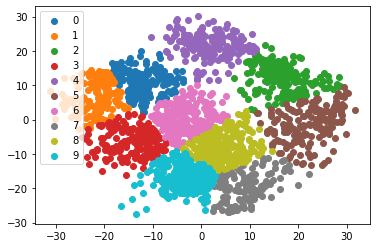

In [2]:
#Charger les bibliotheques necessaires
 
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
#Fonction pour implementer l'algorithme k-means
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #choisir aleatoirement les centres 
    centroids = x[idx, :] #premiere etape
     
    #trouver la distance entre le centre et tous les points autours du centre
    distances = cdist(x, centroids ,'euclidean') #Deuxieme etape
     
    #Centre avec la plus petite distance
    points = np.array([np.argmin(i) for i in distances]) #troisieme etape
     
    #Definir un nombre d'iteration et repeter ces etapes
    #Quatrieme etape
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #UTILISER LA MOYENNE DES CLUSTERS POUR METTRE A JOUR LES CENTRES 
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #;ettre a jour les centres 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 
 
 
#charger les donnees
data = load_digits().data
pca = PCA(2)
  
#Transformer les donnees
df = pca.fit_transform(data)
 
#Appliquer notre fonction
label = kmeans(df,10,1000)
 
#Visualiser les resultats
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()